# Allegheny County Temperature and Climate Trends

## The why

I've lived in Allegheny County (PA) for all of my life so far, and something I've noticed as I've grown up is that it has seemingly gotten warmer. Or, maybe not *warmer*, but the seasons have seemed to offset in some way so that it feels like September in December and feels like December in February. There were several times as a kid where I recall being snowed in completely in December, where white Christmases were not just something we dreamed of. Now, though, the weather here seems to be all out of whack, and it has messed with my seasonal habits. So, I've wanted to try and see if this is just anecdotal or even cyclical or if there is any genuine trend that shows this happening. The results of such a trend coming out could link this to a larger situation (*cough cough* climate change *cough*), so I think it's something worth diving into.

## The data

I found a [dataset](https://www.ncei.noaa.gov/pub/data/cirs/climdiv/) by following a link I found on a USAFacts.org web page that houses monthly average temperatures/precipitation as well as min/max data for every county in the U.S. Opening any of the files looks absolutely horrifying but thankfully there are cool readme files associated with the data, so I found the state codes for each state, and Pennsylvania is 36. But I needed to find the county, so I looked up the postal FIPS code for Allegheny County and it's 42003, *BUT* the first two digits are the state code, which isn't aligned with the 36 given in the county temp readme file. My initial thought is that they just disregarded the postal state IDs and that 003 was the county code for both, but I wasn't sure. Thankfully, there is *another* file in the county temperature thing that maps postal FIPS codes to our climate data ones, and lo and behold 42003 does map to 36003 like I thought. 

After figuring that out, I searched through the average monthly temperatures file for "3600302" (36 - PA, 003 - Allegheny County, 02 - Average Temperature). I grabbed that chunk of data and copied it into my own CSV so I could ignore every other county in the United States, then I did a little editing so the data would work nicely. Namely, I sliced "3600302" off of the beginning of all of the data because it was the same for literally every row (since I'm only looking at Allegheny average temperature data). I also decided to do just a little bit of lying and change the monthly average temperature for December 2021 because it was in as -99.9 degrees, which I don't think is true. So I just copied over the monthly average from November because December really didn't *~feel~* all that different. What remains is the CSV that starts with "ac-tmpccy" in this repo. 

I later repeated this same process for average monthly inches of precipitation, which I felt might be worth looking at at some point as well. This is the "ac-pcpncy" file.

## Analyzing

### Yearly Average Temperatures

The first thing I wanted to look at was if there was an overall upward trend in yearly average temperatures, or really anything of value I could scrape from that at all.

In [1]:
# We'll use Pandas and Matplotlib 'cause they're easy. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Read the average monthly temperatures into a dataframe.
average_temperatures = pd.read_csv("ac-tmpccy-36003-1895-2021.csv")

# Index them by year
average_temperatures = average_temperatures.set_index('Year')

# Here's a preview of the data
average_temperatures

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1895,23.3,19.3,34.8,50.5,59.9,71.6,68.8,71.1,67.8,46.1,41.6,33.7
1896,28.4,29.4,30.9,55.0,66.4,68.0,72.2,70.1,62.3,48.2,45.4,31.7
1897,25.7,32.0,40.1,48.3,56.3,65.7,74.3,68.0,63.8,54.8,41.4,33.0
1898,31.6,28.7,45.0,45.6,61.2,71.2,75.3,72.6,66.8,53.8,39.1,29.6
1899,27.3,22.0,38.0,51.9,63.2,71.0,73.0,72.2,63.8,55.9,42.8,30.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,34.8,40.5,39.9,56.1,59.7,68.7,72.7,69.3,65.9,57.9,41.5,30.1
2018,25.0,38.2,35.0,45.4,67.0,69.5,73.3,72.9,69.3,53.9,38.2,35.8
2019,28.4,34.1,37.3,53.2,63.4,67.7,74.2,71.3,68.7,56.2,38.0,35.6


Year
1917    47.666667
1963    48.416667
1958    48.450000
1924    48.458333
1940    48.741667
          ...    
1991    53.433333
2016    53.466667
1921    53.883333
1998    54.050000
2012    54.075000
Length: 127, dtype: float64


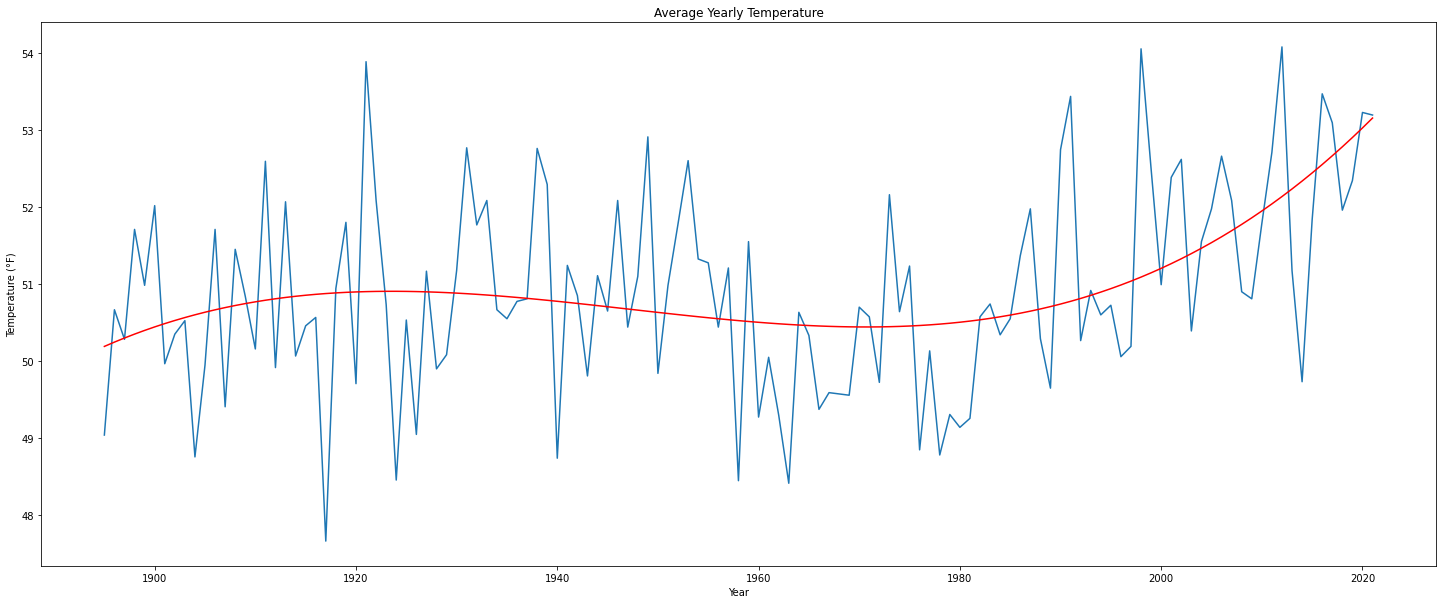

In [2]:
# Get the mean of each column for a yearly average
yearly_average_temps = average_temperatures.mean(axis=1)

# Looks like 1917 is the coldest year and 2012 is the warmest year.
print(yearly_average_temps.sort_values())

fits = np.polynomial.polynomial.Polynomial.fit(yearly_average_temps.index.to_numpy(), yearly_average_temps.to_numpy(),3)

# Plot it real quick, see if anything useful comes out of it.
yearly_average_temps.plot(kind='line', ylabel='Temperature (°F)', xlabel='Year', title='Average Yearly Temperature', figsize=(25,10))
plt.plot(yearly_average_temps.index.to_numpy(), np.polynomial.polynomial.polyval(yearly_average_temps.index.to_numpy(), fits.convert().coef), 'r-')

From this graph you can clearly see an upward trend starting in the 80s, but I'm not sure how useful this is for our purposes. The whole graph has a sort of low-frequency sinusoidal trend to it, so, while it does look like it's gotten pretty consistently warmer for as long as I've been alive, the pattern isn't strong enough to really glean a lot from. With that said, you can see that the average yearly temperature has gone up by about three or four degrees fahrenheit from since we started recording it, which can make a difference.

Thinking back on the original problem, I wanted to see if data supports the anecdotal observation that it has gotten warmer (generally confirmed by yearly average temperature graph) OR

> maybe not *warmer*, but the seasons have seemed to offset in some way so that it feels like September in December and feels like December in February.

### Yearly Average Precipitation

The next simplest data to look at is precipitation, just to see if there is anything to scrape from that data. If that doesn't turn much up, then looking at specific monthly trends starting from recent years might be in order.

In [3]:
average_precipitation = pd.read_csv("ac-pcpncy-36003-1895-2021.csv").set_index("Year")
average_precipitation

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1895,4.23,1.22,2.56,2.62,2.04,3.34,3.53,3.27,1.24,0.70,3.00,2.92
1896,1.46,3.03,3.91,2.10,3.58,4.13,9.44,2.54,4.32,2.41,3.23,1.62
1897,1.96,4.41,4.17,3.57,3.69,2.97,6.11,2.61,1.94,0.23,5.53,3.79
1898,5.21,2.23,5.71,2.63,3.41,3.71,3.99,6.17,1.49,4.36,3.09,2.39
1899,3.14,3.15,4.30,1.67,4.39,4.08,4.24,3.31,2.92,1.56,2.80,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,3.82,1.60,4.38,4.36,5.40,6.67,6.81,3.17,1.25,4.52,4.14,1.62
2018,3.79,6.92,3.01,4.37,3.88,6.59,4.19,5.02,10.08,4.41,4.47,4.59
2019,3.14,4.39,2.31,3.95,6.50,6.67,7.21,3.00,3.12,6.15,2.53,3.63


Year
1930    2.057500
1963    2.310000
1932    2.471667
1988    2.542500
1895    2.555833
          ...   
1956    4.048333
2011    4.053333
2019    4.383333
2004    4.414167
2018    5.110000
Length: 127, dtype: float64


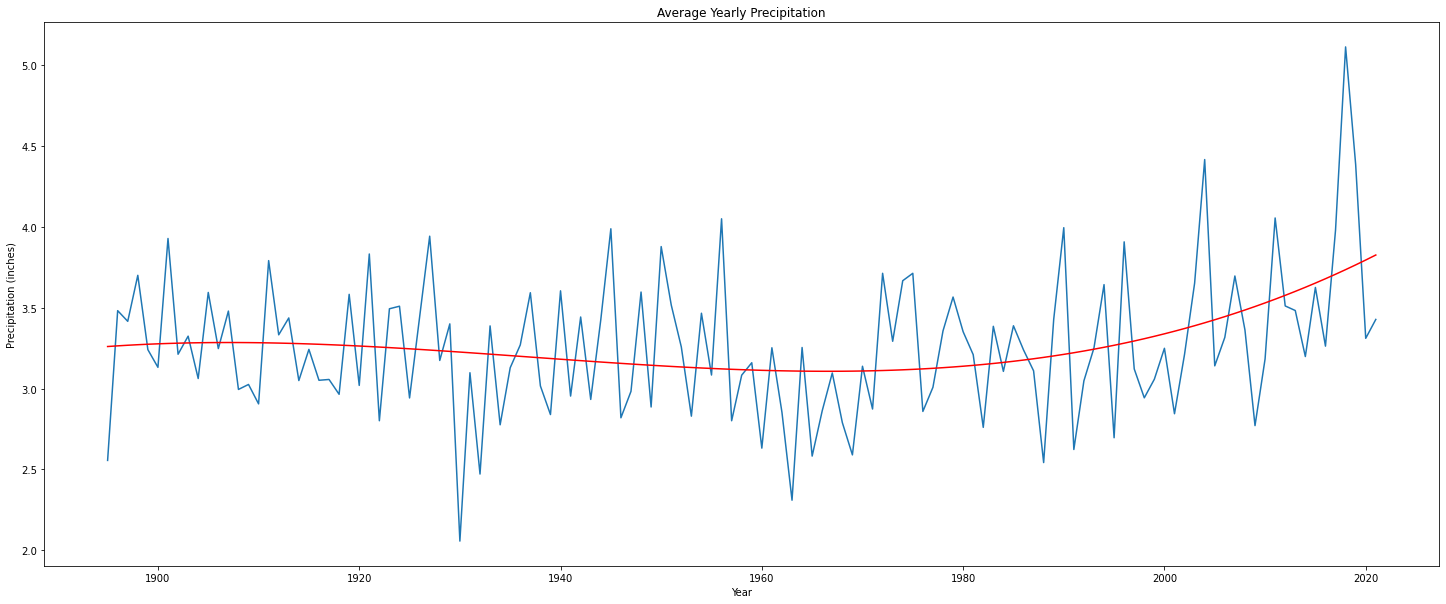

In [4]:
yearly_average_precipitation = average_precipitation.mean(axis=1)

print(yearly_average_precipitation.sort_values())

fits = np.polynomial.polynomial.Polynomial.fit(yearly_average_precipitation.index.to_numpy(), yearly_average_precipitation.to_numpy(),3)

yearly_average_precipitation.plot(kind='line', ylabel='Precipitation (inches)', xlabel='Year', title='Average Yearly Precipitation', figsize=(25,10))
plt.plot(yearly_average_precipitation.index.to_numpy(), np.polynomial.polynomial.polyval(yearly_average_precipitation.index.to_numpy(), fits.convert().coef), 'r-')

I wonder what happened in 1930... 

Anyway, it appears from this graph that it has actually been wetter over the same period that it has gotten warmer. But this could be rain, hail, or snow, which will really depend on the average temperature of the month when most of the precipitation comes from. So, at this point, to get any really interesting information out of this, I think breaking down monthly trends in this warmer/wetter time period of the 90s to to today is going to be what has to happen.

### Monthly Temperature Trends (1980-2021)

What I think will be most useful in determining whether the seasons have been affected (i.e. milder winters, warmer summers, absorbing fall and spring) is to look at the yearly trends for each month. In other words, twelve graphs, one for each month, of the average temperature and precipitation in that month over time. Graphs that are close to a straight line would indicate that the given month has not really gotten all that different during this period, whereas other trends could indicate seasonal flips/shifts.

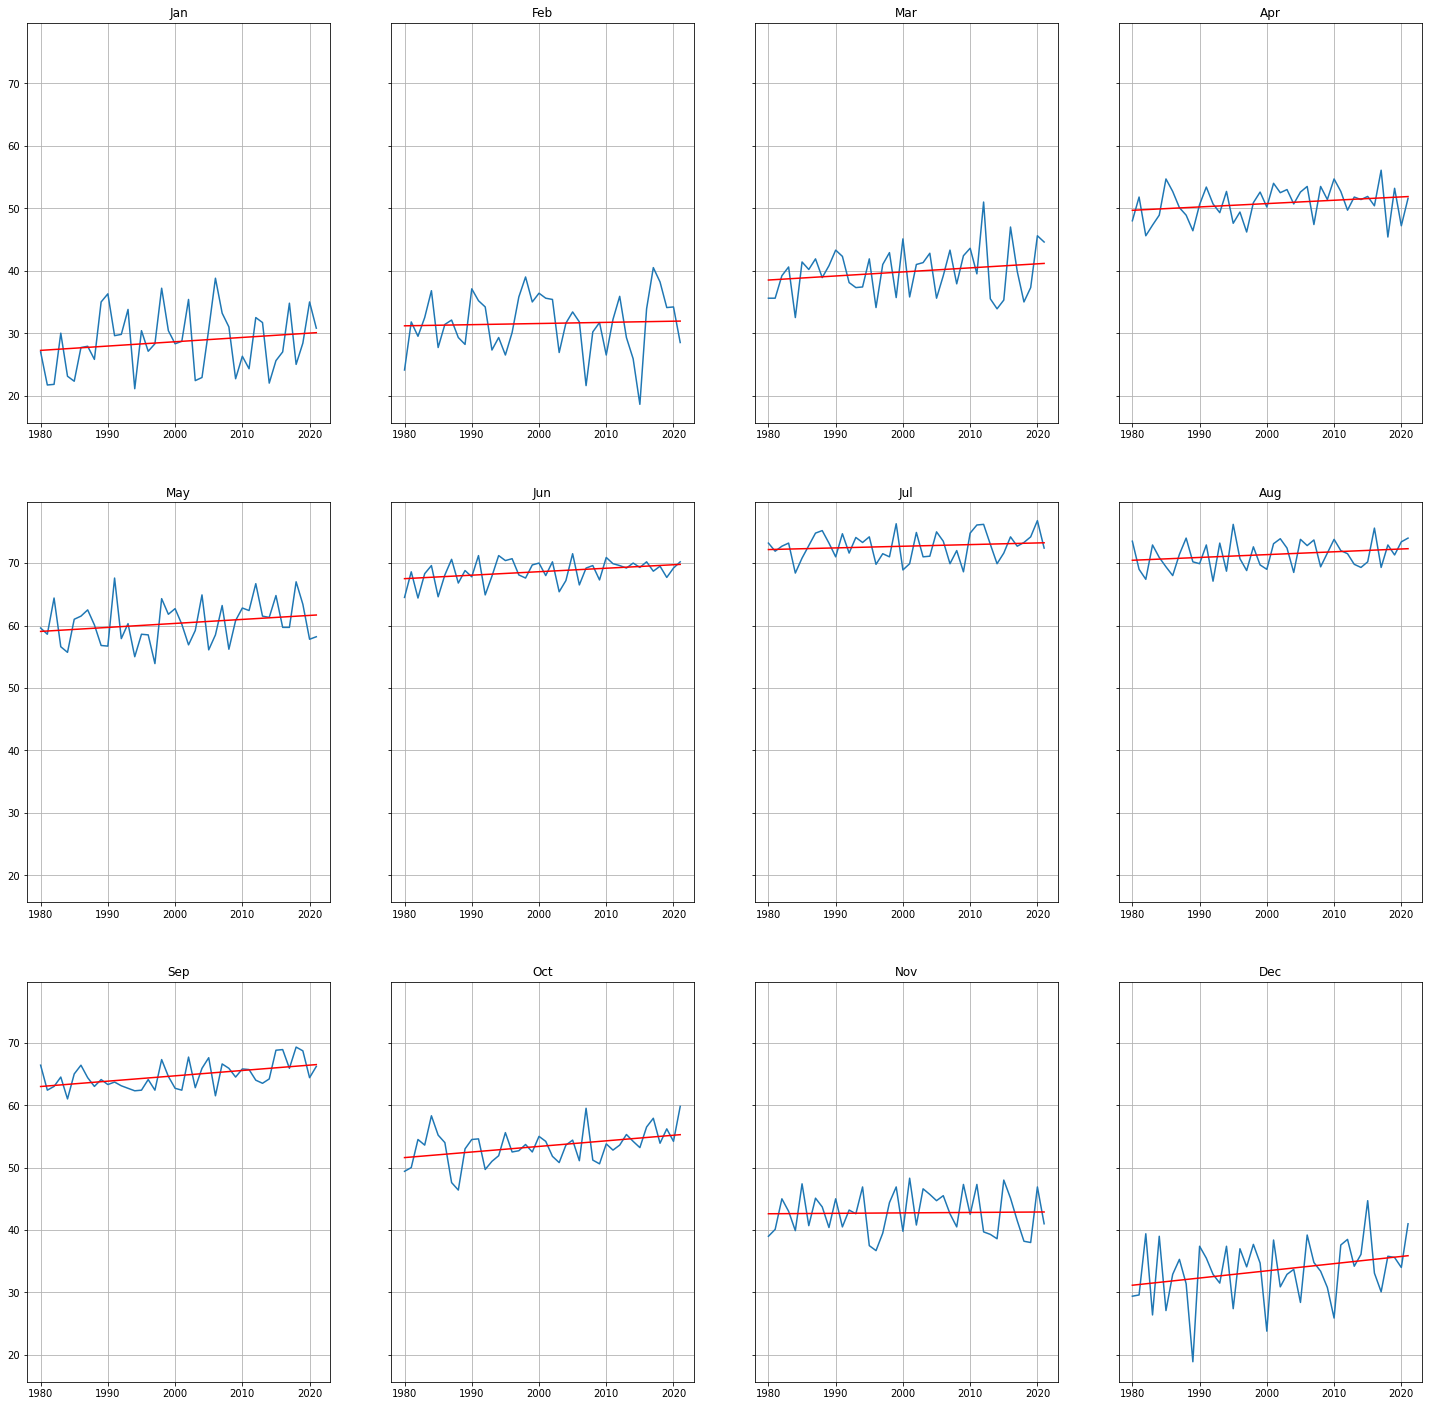

In [5]:
# Make these subplots, this is horrible to scroll through.
fig, axes = plt.subplots(nrows=3,ncols=4,sharey=True)

months = ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
month_num = 0
for row in np.arange(0,3):
    for col in np.arange(0,4):
        month = months[month_num]
        fits = np.polynomial.polynomial.Polynomial.fit(np.arange(1980,2022), average_temperatures[month].loc[1980:],1)
        axes[row,col].plot(np.arange(1980,2022), average_temperatures[month].loc[1980:])
        axes[row,col].plot(np.arange(1980,2022), np.polynomial.polynomial.polyval(np.arange(1980,2022), fits.convert().coef), color="red")
        axes[row,col].title.set_text(month)
        axes[row,col].grid(True)
        month_num = month_num+1

fig.set_figwidth(25)
fig.set_figheight(25)

Those graphs don't look great, but a couple of them seem like they could suggest something useful if you look at their trendlines. For example, January and December have increased in temperature (hence the anecdotal observation that winters have gotten milder, less harshly cold). June, October, and September have increased in general. While fluctuation within a normal range seems to be the usual for most months, some of them have certainly seen crawling upward changes. March has also gotten warmer, which is something I've anecdotally noticed. None of them have downtrends, which makes sense considering this chunk of time has been associated with a general increase in temperature.

On top of that, September and May are almost as hot as the summer months, with huge jumps from March and to October. But this isn't much of a changing trend, this has been the case across all of the 80s to today. Since we know that the temperature has been increasing since the 80s, maybe this was less pronounced before then, but it hasn't been pronounced enough to back my opinion on the seasons changing during my lifetime, since they've been like that for at least as long as I've been around.

### Monthly Precipitation Trends (1980-2021)

Next, I think looking at the precipitation data by month over this same period would be interesting. Considering the precipitation graph had a somewhat more flat trend in general, but still a slightly pronounced increase in precipitation since the 80s, looking at that same span of time might be of some use.  

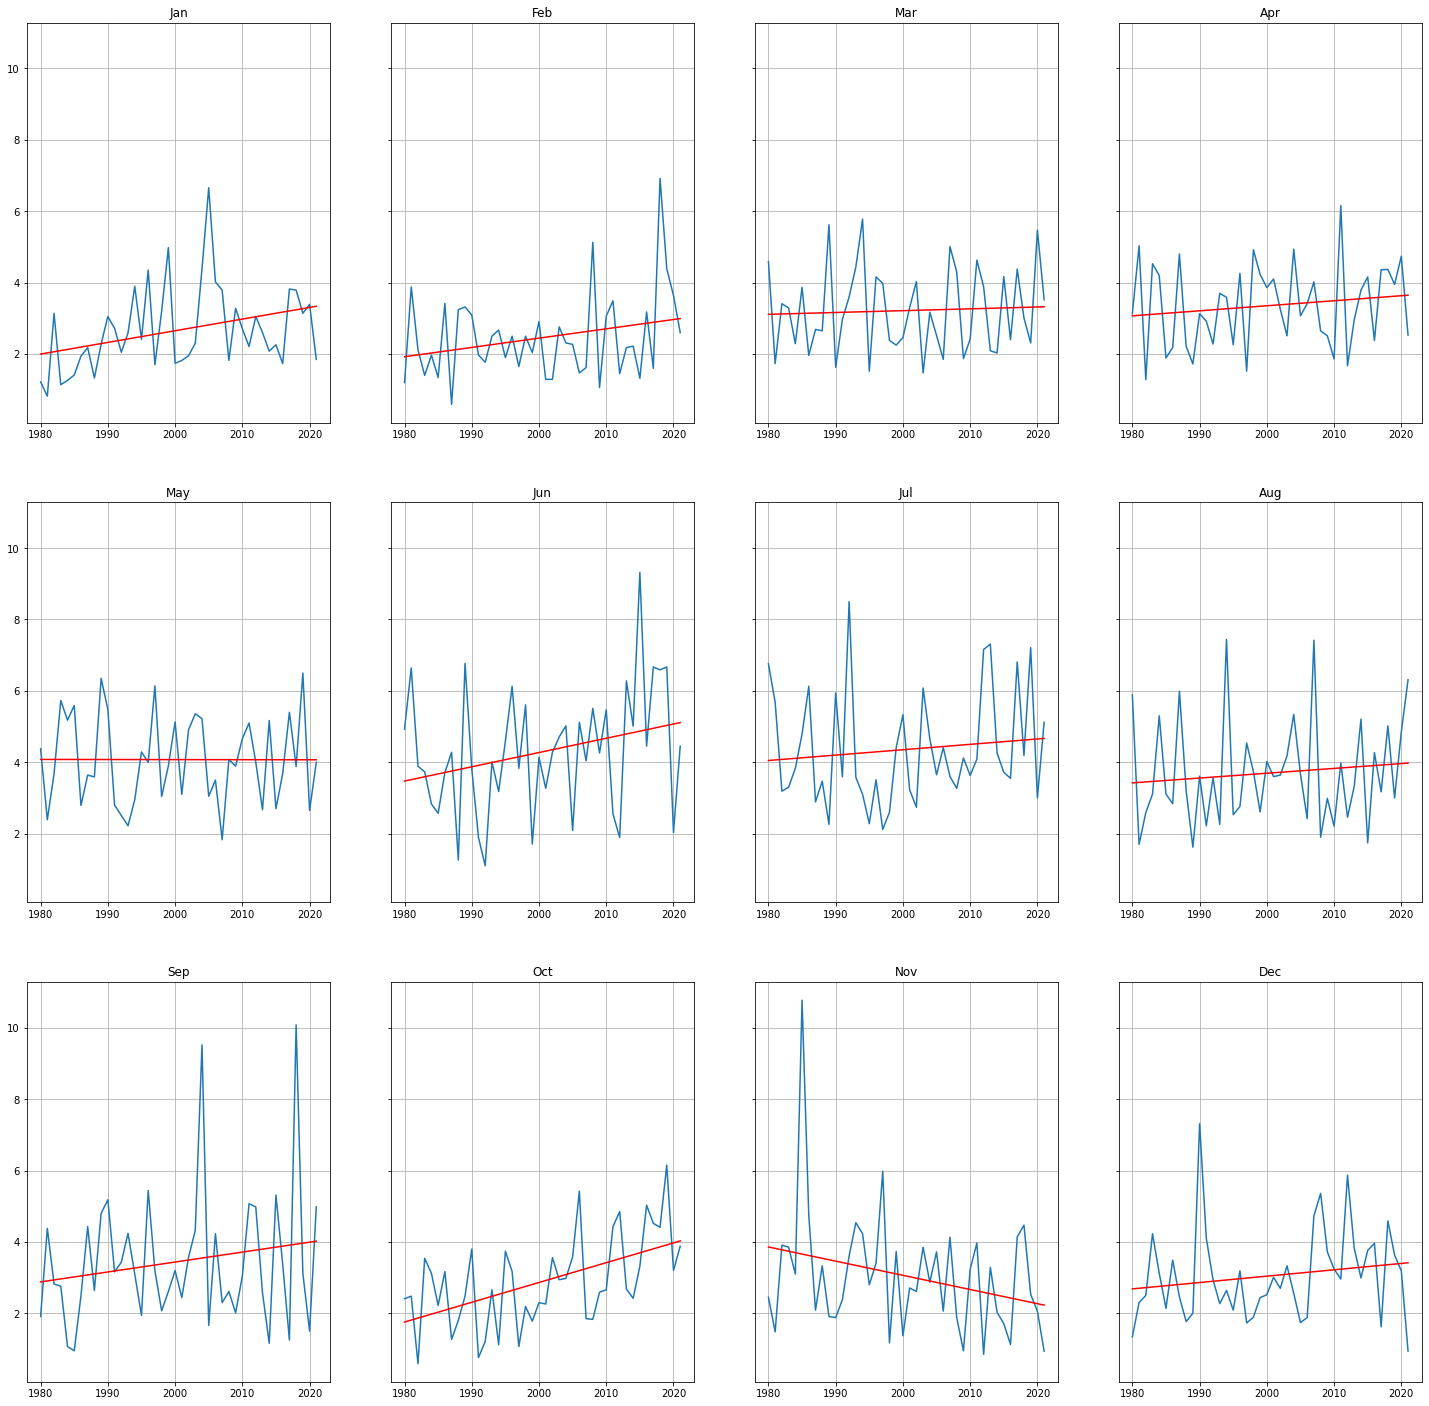

In [8]:
fig, axes = plt.subplots(nrows=3,ncols=4,sharey=True)

months = ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
month_num = 0
for row in np.arange(0,3):
    for col in np.arange(0,4):
        month = months[month_num]
        fits = np.polynomial.polynomial.Polynomial.fit(np.arange(1980,2022), average_precipitation[month].loc[1980:],1)
        axes[row,col].plot(np.arange(1980,2022), average_precipitation[month].loc[1980:])
        axes[row,col].plot(np.arange(1980,2022), np.polynomial.polynomial.polyval(np.arange(1980,2022), fits.convert().coef), color="red")
        axes[row,col].title.set_text(month)
        axes[row,col].grid(True)
        month_num = month_num+1

fig.set_figwidth(25)
fig.set_figheight(25)

There are a lot of more clearly visible trends in this set of graphs. January, February, June, September, and especially October have clearly had more precipitation recently. Combining this information with the temperature trends from above, thsi probably translates into more snow in January and February and more rain in June, September, and October. In the future, though, this might mean more *rain* all around, considering January and February are really the only months that currently have a trend in the freezing temperatures and the temperatures of those months have been crawling up to leave the realm of freezing in recent decades. While December has seen a little bit of an increase in precipitation on average, it probably doesn't mean a white Christmas, because December's temperature now remains in the mid thirties/almost forty degrees on average.

Unlike with the temperatures, this set of graphs does show a downtrend, November has gotten drier. However, I think this might just be an artifact of whatever happened in '85, or whatever year that was. Without that year, November's downtrend is still kind of there, but not as strongly. 

The rest of the months have remained sort of steady, and don't say too much about changing weather patterns. 

### Wet/Dry Seasons by Year

Something that might be helpful when considering precipitation is breaking each year into separate graphs and seeing if a shift has occurred in the seasons that are the most wet and dry. 

Let's see if any patterns exist with respect to precipitation clustering (if clustering exists at all).

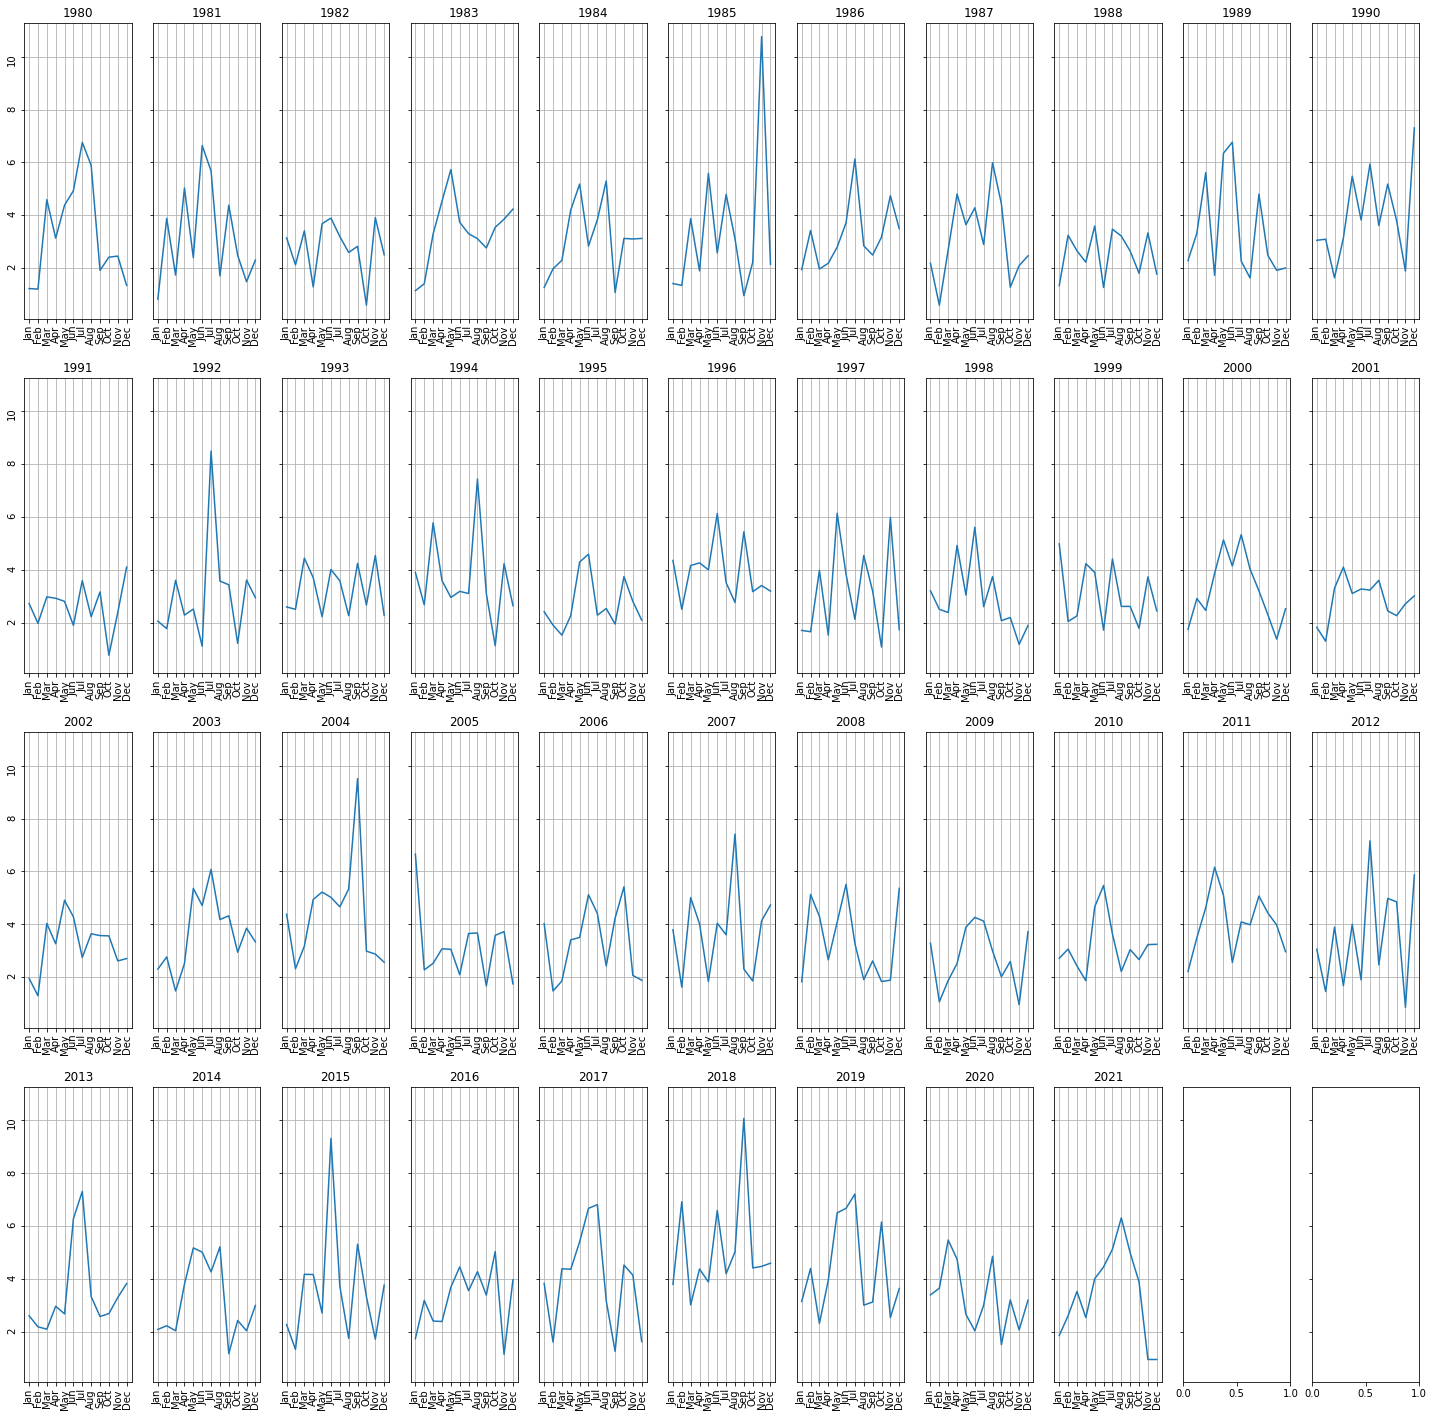

In [18]:
# Here are the individual years' precipitations, in case any useful shifts 
# in primary wet seasons occurred.
year = 1980
fig, axes = plt.subplots(nrows=4,ncols=11,sharey=True)

for row in np.arange(0,4):
    for col in np.arange(0,11):
        axes[row,col].plot(average_precipitation.loc[year])
        axes[row,col].title.set_text(year)
        axes[row,col].grid(True)
        axes[row,col].tick_params(labelrotation=90)
        year = year + 1
        if year > 2021:
            break
fig.set_figwidth(25)
fig.set_figheight(25)